# Convolutional Neural Network (CNN)

Date: 2019-09-08  
Author: skettee  
Categories: Deep Learning, Convolutional Neural Network  
Tags: Convolution, Padding, Pooling, Dropout
<!--eofm-->

영상 인식의 혁명!  컨볼루션 뉴럴 네트워크(Convolutional Neural Network) 에 대해 알아보고 keras를 이용해서 모델링을 해보자!
<!--more-->

실제로 돌려 보고 싶으면 구글 코랩으로 ~  

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/skettee/notebooks/blob/master/convolutional_neural_network.ipynb)

## 문제 (Problem)

💰 고객

> 고양이와 강아지 사진을 구분하는 프로그램이 필요해요~

⚙️ 엔지니어

> 네~ 고객님 
>  
> CNN모델링으로 문제를 해결하자!  

## 데이터 수집 (Data Collection)

모델 훈련을 위해서 CIFAR10에서 고양이와 강아지의 이미지를 골라서 사용한다.

In [2]:
from tensorflow.keras.datasets import cifar10

(train_image, train_label), (test_image, test_label) = cifar10.load_data()

In [3]:
import numpy as np
import pandas as pd

CAT_VALUE = 3
DOG_VALUE = 5

condition_train = (train_label[:,0]==CAT_VALUE) | (train_label[:,0]==DOG_VALUE)
condition_test = (test_label[:,0]==CAT_VALUE) | (test_label[:,0]==DOG_VALUE)

x_train = train_image[condition_train]
y_train = train_label[condition_train]
x_test = test_image[condition_test]
y_test = test_label[condition_test]

print('x_train shape is ', x_train.shape)
print('y_train shape is ', y_train.shape)
print('\nx_test shape is ', x_test.shape)
print('y_test shape is ', y_test.shape)

x_train shape is  (10000, 32, 32, 3)
y_train shape is  (10000, 1)

x_test shape is  (2000, 32, 32, 3)
y_test shape is  (2000, 1)


## 데이터 분석 (Data Analysis)

고양이와 강아지의 데이터셋은 다음과 같다.

- x_train: 32x32x3(RGB), 10,000개의 훈련을 위한 고양이와 강아지의 이미지  
- y_train: 10,000개의 이미지를 고양이(3), 강아지(5)의 두가지 정수 값으로 라벨링
- x_test: 32x32x3(RGB), 2,000개의 테스트를 위한 고양이와 개의 이미지
- y_test:  2,000개의 이미지를 고양이(3), 강아지(5)의 두가지 정수 값으로 라벨링

10개의 훈련 이미지와 레이블은 아래와 같다.  

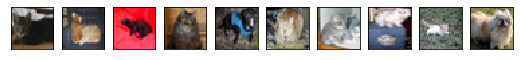

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(9,90))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
y_train[:10]

array([[3],
       [3],
       [3],
       [3],
       [5],
       [3],
       [3],
       [3],
       [3],
       [5]], dtype=uint8)

⚙️ 엔지니어

> 컬러(RGB)이미지의 모든 픽셀값을 피쳐(특징값)로 사용하는 것은 무리다.  
> 예를 들어서 1000X1000의 컬러 이미지의 입력 피쳐 개수는 무려  
> 3,000,000개가 된다.  
> 컴퓨터가 싫어한다...    
> 그래서 엔지니어들은  
> 피쳐 개수를 줄이면서도  
> 이미지의 특징을 잘 보여주는  
> 엣지(Edge) 있는 방법을 찾아 냈다.  
> 그것은 바로...  

### Edge Detection

엔지니어들은 이미지의 특징을 추출하기 위해서 컨벌루션(Convolution)이라는 기법을 개발했다.  
컨벌루션은 이미지에 3X3이나 5X5 필터를 오른쪽과 아래로 이동하며 적용하는 기술이다.  
![컨벌루션](http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif)

출처: [Stanford Deep Learning](http://deeplearning.stanford.edu/wiki)


필터에 들어가는 값에 따라서 다양한 이미지의 특징들을 보여준다.  

아래는 sobel_h, sobel_v 필터링 적용 예다.  

$sobel_h = \begin{bmatrix}
1 & 2 & 1  \\
0 & 0 & 0  \\
-1 & -2 & -1
\end{bmatrix}
\quad
sobel_v =  \begin{bmatrix}
1 & 0 & -1  \\
2 & 0 & -2  \\
1 & 0 & -1
\end{bmatrix}$  

왼쪽은 원본 이미지, 중간은 물체의 가로 경계선이 강조되는 sobel_h 필터를 적용한 이미지, 오른쪽은 물체의 세로 경계선이 강조되는 sobel_v 필터를 적용한 이미지다.  

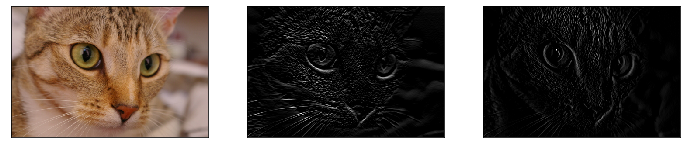

In [5]:
from skimage.data import chelsea
from skimage.filters import sobel_h, sobel_v
from skimage.color import rgb2gray

# INPUT
image = chelsea()
grey_image = rgb2gray(image)

# CONV
edge_h = sobel_h(grey_image)
edge_v = sobel_v(grey_image)

# ReLU
edge_h = np.where(edge_h < 0, 0, edge_h)
edge_v = np.where(edge_v < 0, 0, edge_v)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(edge_h, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(edge_v, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()


⚙️ 엔지니어

> 뉴럴 네트워크를 이용하면  
> 여러개의 필터 껍데기를 준비하고  
> 필터에 들어가는 값을 $w$ 로 놓으면  
> 학습을 하면서  
> 다른 사물과 구분되는  
> 고양이만의 특징을 나타내는  
> 필터 값들을   
> 스스로 최적화 하지 않을까?  


## CNN 모델링 (CNN Modeling)

### Convolutional Layer

이미지에 컨벌루션(Convolution)을 수행하는 레이어다.  
필터의 개수, 필터의 크기, 패딩 방법을 정의한다.  
예를 들어서 (32, 32, 3) 이미지에 (3, 3) 필터 64개를 적용하면 (30, 30, 64)의 이미지가 출력 된다.    
입력 이미지와 출력 이미지의 해상도가 달라지는 것을 방지하기 위해서 패딩(Padding)을 입력 이미지에 적용한다.  

#### 필터 (Filter)

일반적으로 3X3, 5X5 필터를 사용한다.  
보통 필터의 개수는 레이어가 추가될 때마다 두배로 늘린다.

#### 패딩 (Padding)

입력 이미지 매트릭스의 상하, 좌우로 '0'을 추가하는 것을 패딩이라고 한다.  
$f$를 필터 사이즈라고 하고 $p$를 패딩 사이즈라고 하면, 입력 이미지와 출력 이미지의 해상도를 같게 해 주기 위해서는  
$p= \dfrac{f-1}{2}$ 로 한다.  

예를 들어서 (32, 32, 3) 이미지에 (3, 3) 필터 64개를 적용하고 패딩을 1로 하면 (32, 32, 64)의 이미지가 출력 된다.

### Activation Layer

0보다 작은 값은 0으로 만들어서 사물의 경계선만을 특징으로 선택한다. 따라서 렐루(ReLU)를 사용한다.  

### Pooling Layer

보통 레이어가 추가될 때마다 필터 개수는 두배로 늘리고 해상도는 반으로 줄이도록 설계를 한다.
사물의 특징을 보존하면서 해상도를 줄이는 역활을 수행한다.  
Max pooling은 필터값이 없는 윈도우가 이미지 위에서 이동하면서 내부의 값들 중에 최대값을 선택하는 방식이다.  

![Pooling](http://cs231n.github.io/assets/cnn/maxpool.jpeg)

출처: [cs231n Convolutional Neural Networks](http://cs231n.github.io/convolutional-networks/)

#### Dropout

과대적합(Overfitting)을 방지하기 위한 방법으로서 주어진 확률로 랜덤하게 유닛(unit)을 선택해서 꺼버린다.  
예를 들어 레이어의 유닛 수가 32개이고 Dropout의 확률이 0.25이면 입력이 들어올 때마다 8개의 유닛을 랜덤하게 선택해서 꺼버린다.  
훈련 과정에서만 적용해야 한다.  

### FC Layer

히든 레이어(Hidden layer)로서 모든 유닛이 빠짐없이 연결되어 있다.  
Fully Connected Layer로서 덴스(Dense)하게 연결 되어 있다는 뜻. 

### Output Layer

고양이냐 강아지냐, 0과 1의 문제임으로 시그모이드 함수를 사용한다.  

### 정리  

1. CONV = 3X3 filter, padding = 'same', activation='relu' 로 정의한다.
2. [CONV 32] X2 : 32개의 필터로 CONV를 두번 수행한다.  
3. POOL = 2X2 window, dropout = 0.25 로 정의한다.  
4. [POOL] : POOL을 수행한다. 1/4 확률로 랜덤하게 유닛을 꺼버린다.    
5. [CONV 64] X2 : 64개의 필터로 CONV를 두번 수행한다.  
6. [POOL] : POOL을 수행한다. 1/4 확률로 랜덤하게 유닛을 꺼버린다. 
7. FC = activation='relu', 3. dropout = 0.25 로 정의한다.  
8. [FC 512] : 512개의 units로 뉴럴 네트워크 레이어를 정의한다. 1/4 확률로 랜덤하게 유닛을 꺼버린다. 
8. [OUTPUT] : 시그모이드(Sigmoid)로 출력 레이어를 정의한다.


## 케라스(Keras)로 모델링(Modeling)

### 데이터 변환 (Data Transformation)

#### 정규화 (Normalization)

입력 이미지에 대해서 `정규값 = (현재값 - 최소값) / (최대값-최소값)` 으로 정규화 한다!  
최소값이 0이고, 최대값이 255이니까 현재값에서 /255 를 해 주면 된다. 


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#### 이진 분류 (Binary Classification)

고양이냐 강아지냐를 선택하는 0과 1의 문제다. 따라서 출력 레이어(output layer)의 활성화 함수(activation function)는 당근 시그모이드(Sigmoid)를 사용한다. 따라서 고양이를 0, 강아지를 1로 변환한다.  

In [5]:
y_train = np.where(y_train==3, 0, 1)
y_test = np.where(y_test==3, 0, 1)

### 모델링 (Modeling)

In [7]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import os

save_dir = os.getcwd()
model_name = 'keras_catdog_trained_model.h5'

batch_size = 32
epochs = 100

model = Sequential()
# CONV 32 X2
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# POOL
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV 64 X2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# POOL
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Vectorize
model.add(Flatten())
# FC 512
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# OUTPUT
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


### 모델 훈련 (Train Model)

모델의 훈련 결과를 파일로 저장해서 필요할 때 재훈련 없이 불러서 사용할 수 있다.

⚙️ 엔지니어

> 아...  
> GPU 없으면 한시간 이상 걸린다...  
> 커피 두잔 하고 오세여~  ☕️☕️  

In [9]:
hist = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              shuffle=True,
              verbose=0)

# Save model and weights
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

train_acc = hist.history['acc'][-1]
train_loss =  hist.history['loss'][-1]

print('train accuracy: ', train_acc)
print('train loss: ', train_loss)

Saved trained model at /home/dataman/myWork/deeplearning/keras_catdog_trained_model.h5 
train accuracy:  0.9818
train loss:  0.05223268212089315


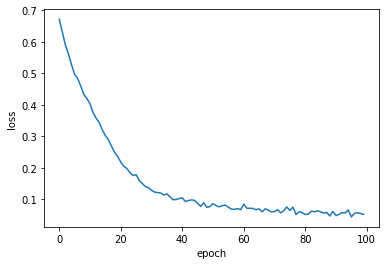

In [10]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 정확도 평가 (Test Model)

훈련 정확도와 테스트 정확도의 차이가 많이 난다.  
과대적합(Overfitting) 현상이다.  

그래도 10마리 중 8마리는 맞춘다는...

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.7301398019790649
Test accuracy: 0.807


In [12]:
import pandas as pd

df = pd.DataFrame(data=[[train_acc, test_acc]], 
                  index = ['CNN'],
                  columns=['train accuracy', 'test accuracy'])
df

,train accuracy,test accuracy
CNN,0.9818,0.807


## 해결 (Solution)

⚙️ 엔지니어  

> 고객님~ 원하시는 솔루션입니다.   
> pick_image에  이미지 번호를 입력하시면    
> 고양이, 강아지를 인식해서 알려 드립니다  
> 정확도는 80%입니다~  


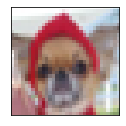

This is a  dog


In [10]:
from  tensorflow.keras.models import load_model
import os

load_dir = os.getcwd()
model_name = 'keras_catdog_trained_model.h5'
model_path = os.path.join(load_dir, model_name)

pick_image = 30 # 0 ~ 1,999

def predict_catdog(x, model):
    x_data =(np.expand_dims(x, 0))
    predict = model.predict(x_data)
    #print(predict)
    if predict < 0.5:
        return 'cat'
    else:
        return 'dog'

test_data = x_test[pick_image]
model = load_model(model_path)

result = predict_catdog(test_data, model)

plt.figure(figsize=(2,2))
plt.imshow(test_data)
plt.xticks([])
plt.yticks([])
plt.show()
print('This is a ', result)